<a href="https://colab.research.google.com/github/Danielfasuba/ml-learning-models/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries and tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Constants; Link to titanic dataset
TITANIC_PATH = '/content/drive/MyDrive/Colab Notebooks/tested.csv'

In [3]:
# Loading dataset
titanic = pd.read_csv(TITANIC_PATH)

Discovering the dataset

In [4]:
# Preview of titanic dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# showing quick description of data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Showing statistics of numerical attributes
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic["Embarked"].value_counts() # checking sub-categories of categorical features

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [8]:
titanic["Parch"].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

Splitting the data into train and test set

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(titanic, test_size=0.2, random_state=5)

Exploring data to gain insights

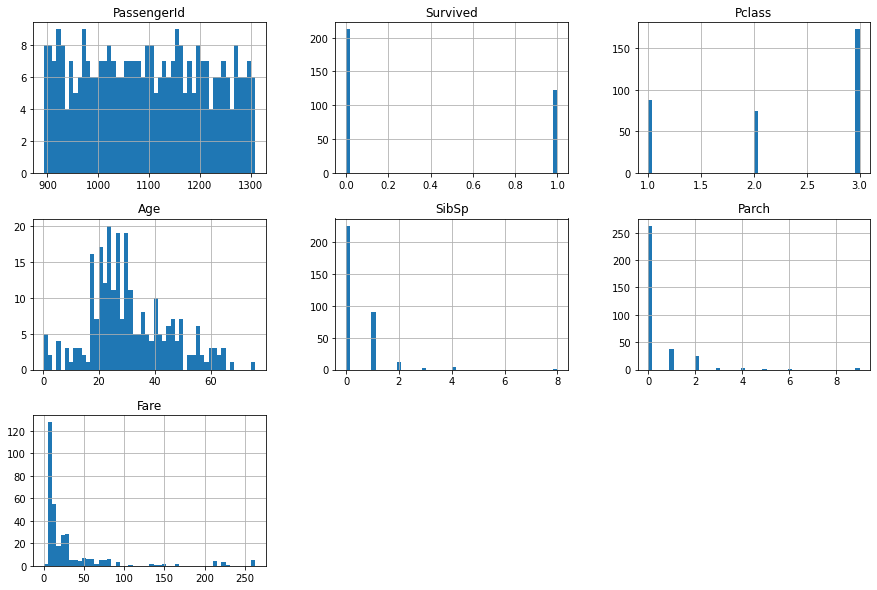

In [10]:
%matplotlib inline
train_set.hist(bins=50, figsize=(15, 10))
plt.show()

In [11]:
# Computing the standard correlations coefficients using corr() method
corr_matrix = train_set.corr()

In [12]:
corr_matrix["Survived"].sort_values(ascending=False) 
# Noting there's barely any linear correlation between Survived attribute and other attributes

Survived       1.000000
Fare           0.165999
Parch          0.147657
SibSp          0.106087
Age            0.008288
PassengerId   -0.031531
Pclass        -0.093250
Name: Survived, dtype: float64

Data Preparation

In [13]:
# separating the predictors from labels
titanic = train_set.drop("Survived", axis=1)
titanic_lab = train_set[["Survived"]].copy()

In [14]:
titanic_lab = np.ravel(titanic_lab) # Converting the labels to a 1D array
type(titanic_lab)

numpy.ndarray

In [15]:
X_titanic = titanic.drop("Cabin", axis=1) # dropping cabin; too many missing values

In [16]:
median_age = titanic["Age"].median()
X_titanic["Age"].fillna(median_age, inplace=True) # Filling missing age values with median age

In [17]:
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 123 to 355
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  334 non-null    int64  
 1   Pclass       334 non-null    int64  
 2   Name         334 non-null    object 
 3   Sex          334 non-null    object 
 4   Age          334 non-null    float64
 5   SibSp        334 non-null    int64  
 6   Parch        334 non-null    int64  
 7   Ticket       334 non-null    object 
 8   Fare         334 non-null    float64
 9   Embarked     334 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 28.7+ KB


In [18]:
# Segregating numerical and categorical data
titanic_num = X_titanic[["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
titanic_cat = X_titanic[["Name", "Sex", "Ticket", "Embarked"]]

In [19]:
# Preparing data for tranformation; using ColumnTranformer to tranform both numerical and categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = list(titanic_num)
cat_attribs = ["Sex", "Embarked"] # Leaving out the Name and Ticket features because values are discrete

In [20]:
pipeline = ColumnTransformer( 
    transformers=[("num", StandardScaler(), num_attribs),
                  ("cat", OneHotEncoder(), cat_attribs)],
    remainder = 'drop',
)

In [21]:
# Fitting the dataset into the pipeline
titanic_prepared = pipeline.fit_transform(X_titanic)

Transforming the test set

In [22]:
# 
titanic_test = test_set.drop("Survived", axis=1)
titanic_test_lab = test_set[["Survived"]].copy()

In [23]:
titanic_test.info() # noticing missing value in fare

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 161 to 101
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  84 non-null     int64  
 1   Pclass       84 non-null     int64  
 2   Name         84 non-null     object 
 3   Sex          84 non-null     object 
 4   Age          73 non-null     float64
 5   SibSp        84 non-null     int64  
 6   Parch        84 non-null     int64  
 7   Ticket       84 non-null     object 
 8   Fare         83 non-null     float64
 9   Cabin        15 non-null     object 
 10  Embarked     84 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 7.9+ KB


In [24]:
median_fare = titanic["Fare"].median()
titanic_test["Fare"].fillna(median_fare, inplace=True)

In [25]:
titanic_test = titanic_test.drop("Cabin", axis=1) # dropping cabin; too many missing values
titanic_test["Age"].fillna(median_age, inplace=True) # Filling missing age values with median age

In [26]:
titanic_test_lab = np.ravel(titanic_test_lab) # converting labels to 1D array

In [27]:
titanic_test_trans = pipeline.fit_transform(titanic_test)
titanic_test_trans[:5]

array([[-0.55406015,  0.82870199, -1.69320991,  0.43893115,  0.92270547,
        -0.38179113,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.35132293, -1.61378809,  1.86101632, -0.43893115,  0.92270547,
        -0.06288896,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.45704604, -0.39254305, -0.64309762,  1.31679344,  0.92270547,
        -0.27941427,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.26650774, -1.61378809,  0.36662574, -0.43893115, -0.56781875,
         2.20930648,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ],
       [-0.0570037 ,  0.82870199, -0.56231975, -0.43893115, -0.56781875,
        -0.47679557,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ]])

Training support vector machine model

In [28]:
from sklearn import svm
svm_clf = svm.SVC()

In [29]:
svm_clf.fit(titanic_prepared, titanic_lab)

SVC()

In [30]:
# Evaluating accuracy on training set
titanic_pred_svm = svm_clf.predict(titanic_prepared)
svm_correct_pred = (titanic_lab == titanic_pred_svm).sum()

In [31]:
svm_accuracy = svm_correct_pred / len(titanic_prepared)
svm_accuracy

1.0

In [32]:
# Using K-fold cross validation and accuracy as metric to evaluate model
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, titanic_prepared, titanic_lab, scoring="accuracy", cv=6)

In [33]:
svm_scores

array([1.        , 1.        , 0.96428571, 1.        , 0.96363636,
       1.        ])

In [34]:
# Evaluating accuracy on test set
test_pred_svm = svm_clf.predict(titanic_test_trans)

test_correct_pred = (titanic_test_lab == test_pred_svm).sum()

In [35]:
svm_accuracy = test_correct_pred / len(titanic_test_trans)
svm_accuracy
# svm model accuracy on test set close to that of training set; hence model not overfitting

0.9880952380952381